PCA UNTREATED DATA (ONLY BALANCED QUANTITY)

ONLY FOCUS REGION

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_NWIN_CLND_BLNCD_2.csv")

In [4]:
df_0.head()

prov_char country_char               wavenumber   649.893   650.376  \
0       SUX           ID  ID-SUX-069-2309-002_005  0.019580  0.020577   
1       SUX           ID  ID-SUX-074-2311-001_005  0.015026  0.014997   
2       KTX           ID  ID-KTX-068-2306-002_104  0.007675  0.007844   
3       SGR           MY  MY-SGR-096-2401-002_NCB  0.007805  0.006585   
4       SSX           ID  ID-SSX-068-2307-028_202  0.011577  0.012206   

    650.858    651.34   651.822   652.304   652.786  ...  3999.158   3999.64  \
0  0.021276  0.021531  0.021289  0.020601  0.019603  ...  0.000612  0.000631   
1  0.015173  0.015566  0.016130  0.016762  0.017332  ... -0.000344 -0.000257   
2  0.008136  0.008477  0.008800  0.009070  0.009293  ...  0.002002  0.002076   
3  0.005669  0.005116  0.004945  0.005136  0.005631  ...  0.001007  0.001068   
4  0.012885  0.013565  0.014162  0.014576  0.014721  ...  0.000027  0.000041   

   4000.122  tgp_name  dgp_name  fgp_name  country_name  thnoth_name  \
0  0.000619   Group 3   Group 2   Group 3     Indonesia     Non-Thai   
1 -0.000145   Group 3   Group 2   Group 3     Indonesia     Non-Thai   
2  0.002142   Group 3   Group 2   Group 4     Indonesia     Non-Thai   
3  0.001182   Group 2   Group 2   Group 3      Malaysia     Non-Thai   
4  0.000028   Group 3   Group 2   Group 3     Indonesia     Non-Thai   

   thnoth_name_encoded  predictions  
0                    0            0  
1                    0            0  
2                    0            0  
3                    0            0  
4                    0            0  

[5 rows x 6960 columns]

In [5]:
# Define the regions of interest
regions_of_interest = [
    (2996, 3016), (2943, 2963), (2912, 2932), (2843, 2863),
    (1490, 2010), (1455, 1475), (1408, 1428), (1368, 1388),
    (1225, 1245), (1150, 1170), (1106, 1126), (1088, 1108),
    (990, 920), (712, 732)
]

In [6]:
# Extract columns corresponding to the regions of interest
columns_to_focus = []
for start, end in regions_of_interest:
    columns_to_focus.extend([col for col in df_0.columns[4:-7] if start <= float(col) <= end])


In [7]:
# Create a new DataFrame with the selected regions
df_0_selected_regions = df_0[columns_to_focus]

In [8]:
df_0_selected_regions.head()

2996.355  2996.837   2997.32  2997.802  2998.284  2998.766  2999.248  \
0  0.021364  0.021383  0.021439  0.021547  0.021711  0.021918  0.022146   
1  0.014427  0.014655  0.014873  0.015088  0.015310  0.015549  0.015808   
2  0.013520  0.013648  0.013794  0.013960  0.014146  0.014352  0.014578   
3  0.012089  0.012421  0.012758  0.013078  0.013366  0.013614  0.013828   
4  0.014594  0.014797  0.014981  0.015146  0.015303  0.015467  0.015649   

    2999.73  3000.212  3000.694  ...   727.514   727.996   728.478   728.961  \
0  0.022365  0.022551  0.022690  ...  0.067434  0.065359  0.063329  0.061421   
1  0.016085  0.016375  0.016671  ...  0.057494  0.055931  0.054566  0.053355   
2  0.014828  0.015102  0.015398  ...  0.055616  0.054881  0.054267  0.053654   
3  0.014020  0.014208  0.014406  ...  0.056227  0.054337  0.052418  0.050546   
4  0.015859  0.016092  0.016336  ...  0.054198  0.053183  0.052173  0.051142   

    729.443   729.925   730.407   730.889   731.371   731.853  
0  0.059656  0.057995  0.056354  0.054640  0.052793  0.050798  
1  0.052246  0.051206  0.050221  0.049295  0.048431  0.047623  
2  0.052934  0.052042  0.050966  0.049748  0.048458  0.047165  
3  0.048804  0.047253  0.045928  0.044826  0.043909  0.043111  
4  0.050101  0.049080  0.048113  0.047224  0.046416  0.045675  

[5 rows x 1576 columns]

In [9]:
# Combine the selected regions with the target column and other relevant columns
df_0_sr_1 = pd.concat([df_0[['thnoth_name', 'prov_char', 'country_char', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name']], df_0_selected_regions], axis=1)

In [10]:
df_0_sr_1.head()

thnoth_name prov_char country_char tgp_name dgp_name fgp_name country_name  \
0    Non-Thai       SUX           ID  Group 3  Group 2  Group 3    Indonesia   
1    Non-Thai       SUX           ID  Group 3  Group 2  Group 3    Indonesia   
2    Non-Thai       KTX           ID  Group 3  Group 2  Group 4    Indonesia   
3    Non-Thai       SGR           MY  Group 2  Group 2  Group 3     Malaysia   
4    Non-Thai       SSX           ID  Group 3  Group 2  Group 3    Indonesia   

   2996.355  2996.837   2997.32  ...   727.514   727.996   728.478   728.961  \
0  0.021364  0.021383  0.021439  ...  0.067434  0.065359  0.063329  0.061421   
1  0.014427  0.014655  0.014873  ...  0.057494  0.055931  0.054566  0.053355   
2  0.013520  0.013648  0.013794  ...  0.055616  0.054881  0.054267  0.053654   
3  0.012089  0.012421  0.012758  ...  0.056227  0.054337  0.052418  0.050546   
4  0.014594  0.014797  0.014981  ...  0.054198  0.053183  0.052173  0.051142   

    729.443   729.925   730.407   730.889   731.371   731.853  
0  0.059656  0.057995  0.056354  0.054640  0.052793  0.050798  
1  0.052246  0.051206  0.050221  0.049295  0.048431  0.047623  
2  0.052934  0.052042  0.050966  0.049748  0.048458  0.047165  
3  0.048804  0.047253  0.045928  0.044826  0.043909  0.043111  
4  0.050101  0.049080  0.048113  0.047224  0.046416  0.045675  

[5 rows x 1583 columns]

In [11]:
# Standardize the data
scaler_0 = StandardScaler()
scaled_data_0 = scaler_0.fit_transform(df_0_sr_1[columns_to_focus])

In [12]:
# Perform PCA
pca_0 = PCA(n_components=10)
principal_components_0 = pca_0.fit_transform(scaled_data_0)

In [13]:
# Create a DataFrame with the principal components
pca_df_0 = pd.DataFrame(data=principal_components_0, columns=[f'PC{i+1}' for i in range(10)])
pca_df_0 = pd.concat([df_0_sr_1[['thnoth_name', 'prov_char', 'country_char', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name']], pca_df_0], axis=1)

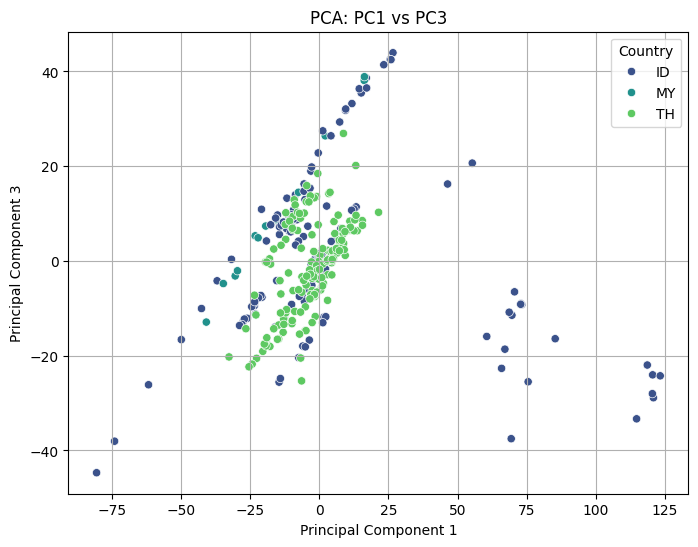

In [14]:
# Plot PC1 vs PC3
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC3', hue='country_char', data=pca_df_0, palette='viridis')
plt.title('PCA: PC1 vs PC3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(title='Country')
plt.grid(True)
plt.show()

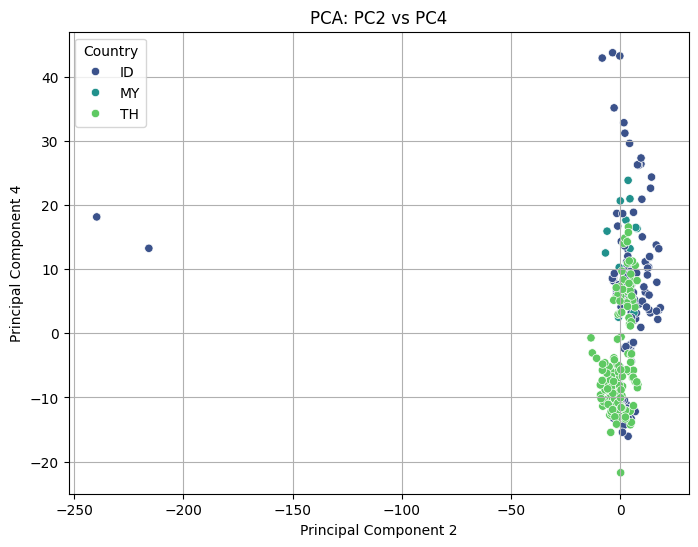

In [15]:
# Plot PC2 vs PC4
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC2', y='PC4', hue='country_char', data=pca_df_0, palette='viridis')
plt.title('PCA: PC2 vs PC4')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 4')
plt.legend(title='Country')
plt.grid(True)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

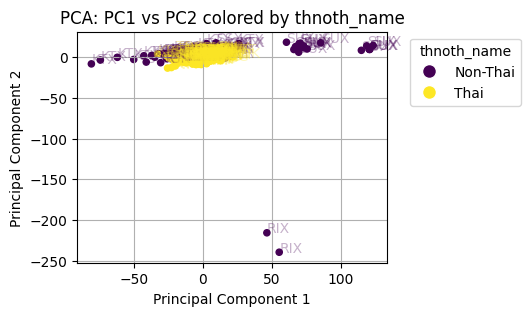

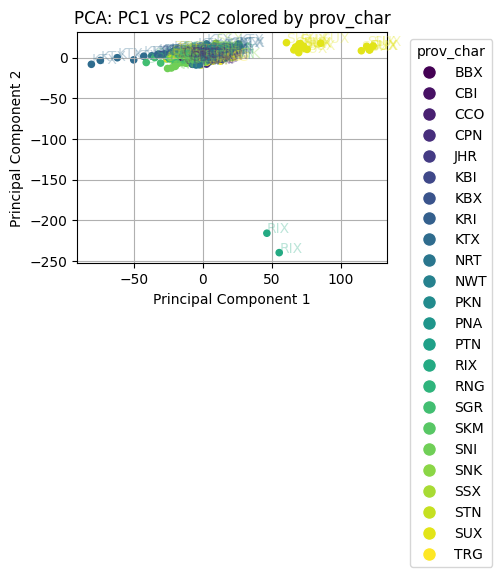

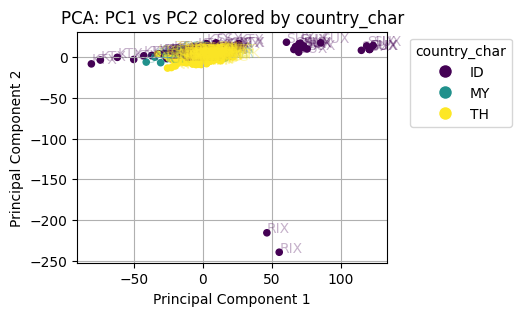

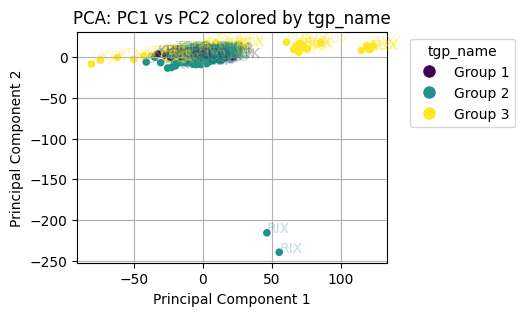

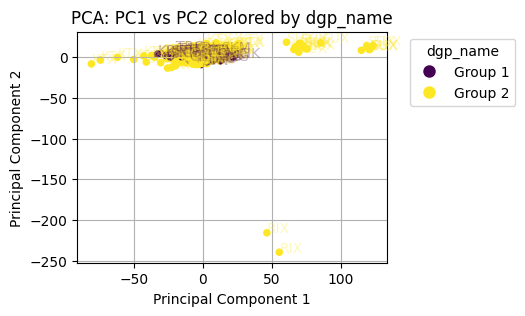

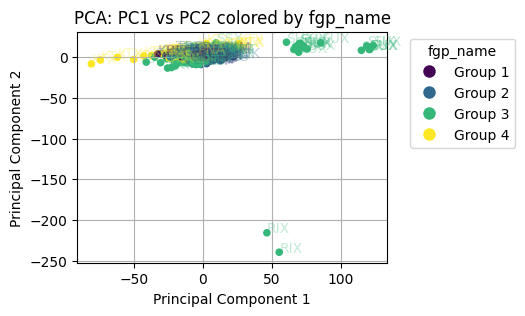

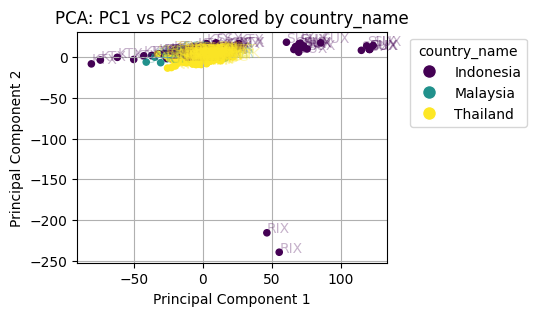

In [18]:
# Plot PC1 vs PC2 with different cluster colors
string_cols = ['thnoth_name', 'prov_char', 'country_char', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name']

label_encoder = LabelEncoder()
for col in string_cols:
    encoded_categories = label_encoder.fit_transform(pca_df_0[col])
    
    plt.figure(figsize=(4, 3))
    scatter = plt.scatter(pca_df_0['PC1'], pca_df_0['PC2'], c=encoded_categories, cmap='viridis', s=20)
    plt.title(f'PCA: PC1 vs PC2 colored by {col}')
    
    # Get the colormap and normalization from the scatter plot
    cmap = scatter.cmap
    norm = scatter.norm
    
    # Annotate points with 'prov_char' column
    for j in range(len(pca_df_0)):
        plt.annotate(pca_df_0['prov_char'].iloc[j], 
                     (pca_df_0['PC1'].iloc[j], pca_df_0['PC2'].iloc[j]), 
                     color=cmap(norm(encoded_categories[j])), alpha=0.3)
    
    # Customize the legend to show original string labels
    unique_labels = label_encoder.classes_
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=cmap(norm(value)))
               for value, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

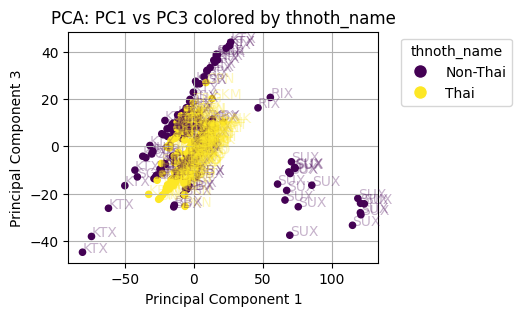

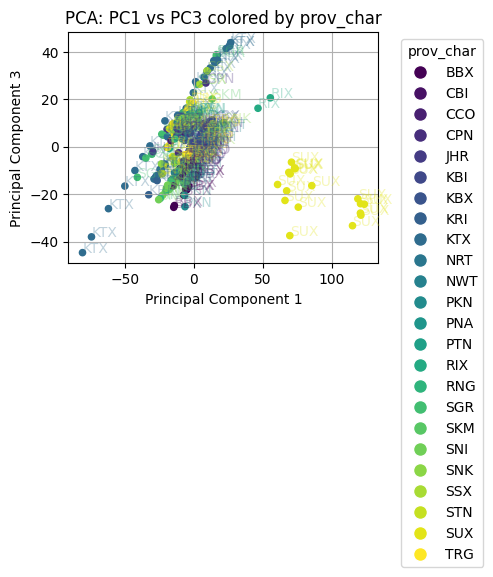

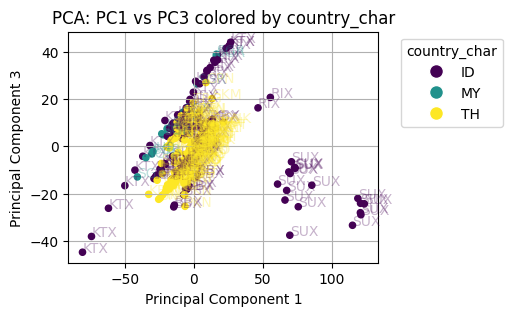

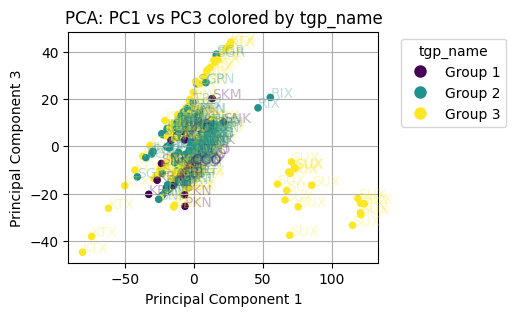

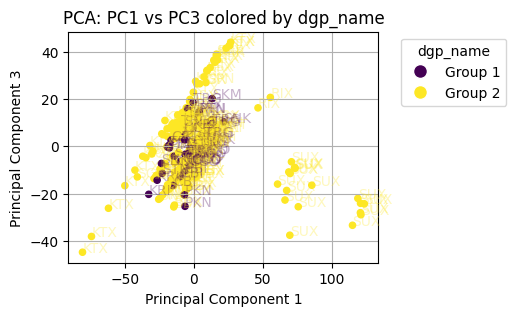

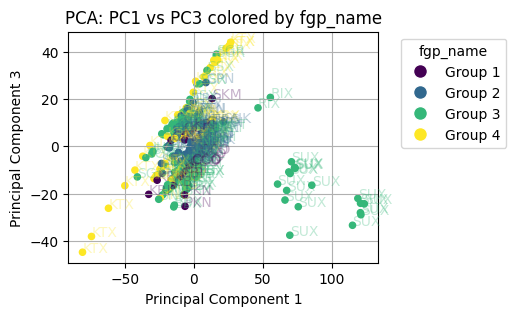

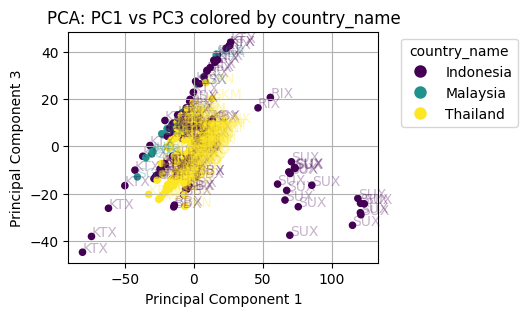

In [19]:
# Plot PC1 vs PC3, PC2 vs PC3, and PC2 vs PC4 with different cluster colors

# PC1 vs PC3
for col in string_cols:
    encoded_categories = label_encoder.fit_transform(pca_df_0[col])
    
    plt.figure(figsize=(4, 3))
    scatter = plt.scatter(pca_df_0['PC1'], pca_df_0['PC3'], c=encoded_categories, cmap='viridis', s=20)
    plt.title(f'PCA: PC1 vs PC3 colored by {col}')
    
    cmap = scatter.cmap
    norm = scatter.norm
    
    for j in range(len(pca_df_0)):
        plt.annotate(pca_df_0['prov_char'].iloc[j], 
                     (pca_df_0['PC1'].iloc[j], pca_df_0['PC3'].iloc[j]), 
                     color=cmap(norm(encoded_categories[j])), alpha=0.3)
    
    unique_labels = label_encoder.classes_
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=cmap(norm(value)))
               for value, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 3')
    plt.grid(True)
    plt.show()

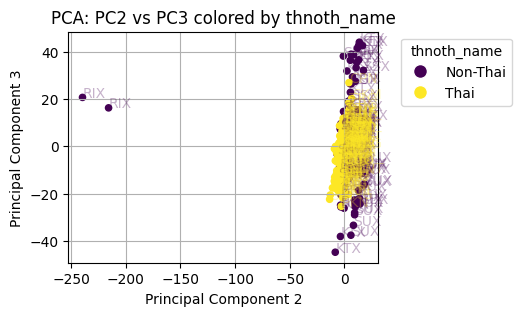

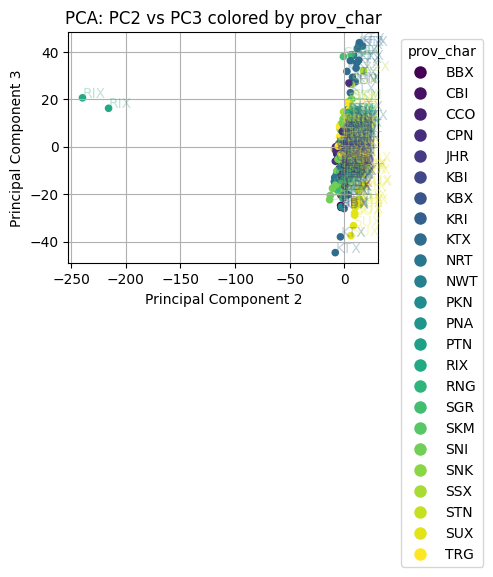

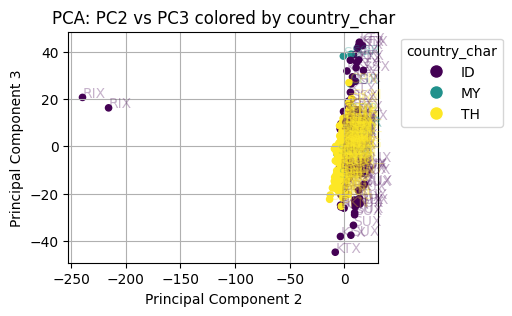

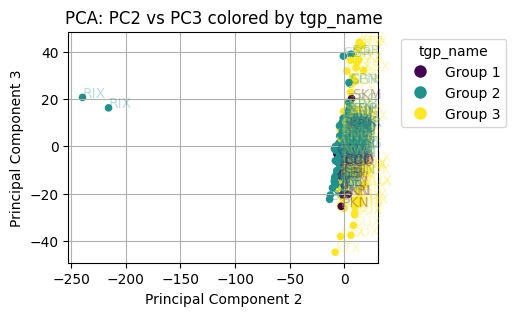

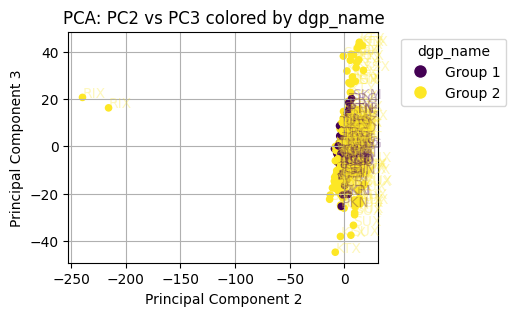

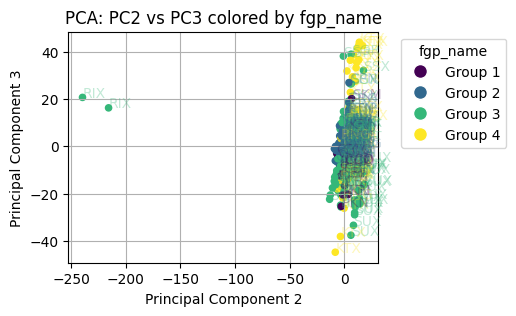

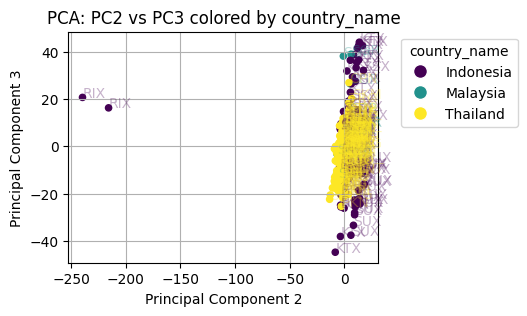

In [20]:
# PC2 vs PC3
for col in string_cols:
    encoded_categories = label_encoder.fit_transform(pca_df_0[col])
    
    plt.figure(figsize=(4, 3))
    scatter = plt.scatter(pca_df_0['PC2'], pca_df_0['PC3'], c=encoded_categories, cmap='viridis', s=20)
    plt.title(f'PCA: PC2 vs PC3 colored by {col}')
    
    cmap = scatter.cmap
    norm = scatter.norm
    
    for j in range(len(pca_df_0)):
        plt.annotate(pca_df_0['prov_char'].iloc[j], 
                     (pca_df_0['PC2'].iloc[j], pca_df_0['PC3'].iloc[j]), 
                     color=cmap(norm(encoded_categories[j])), alpha=0.3)
    
    unique_labels = label_encoder.classes_
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=cmap(norm(value)))
               for value, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Principal Component 2')
    plt.ylabel('Principal Component 3')
    plt.grid(True)
    plt.show()

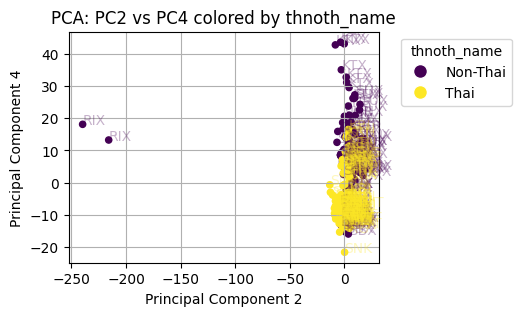

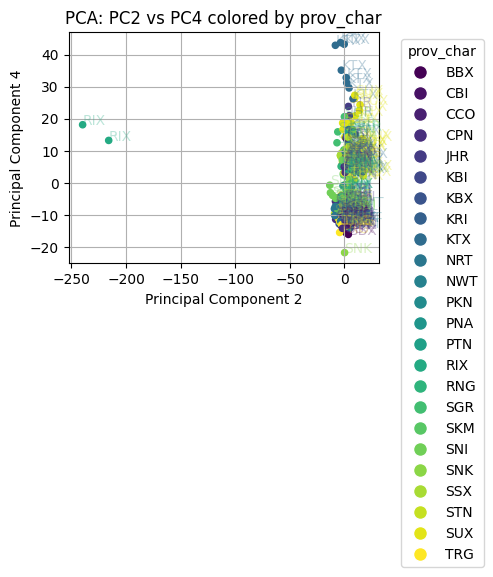

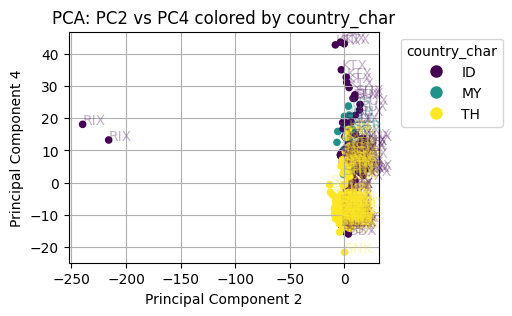

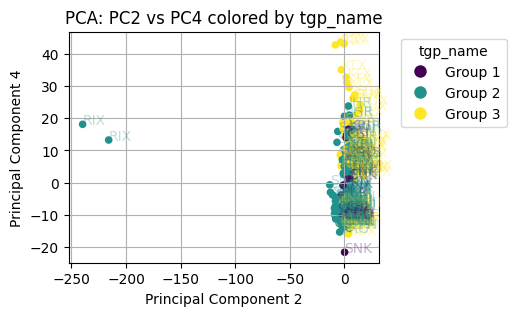

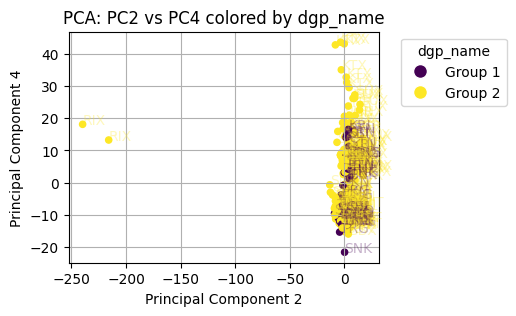

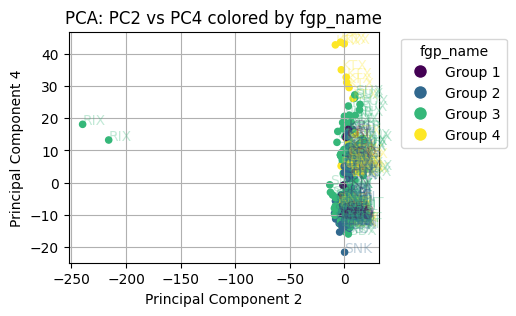

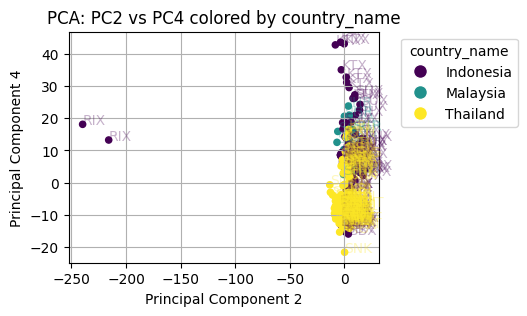

In [21]:
# PC2 vs PC4
for col in string_cols:
    encoded_categories = label_encoder.fit_transform(pca_df_0[col])
    
    plt.figure(figsize=(4, 3))
    scatter = plt.scatter(pca_df_0['PC2'], pca_df_0['PC4'], c=encoded_categories, cmap='viridis', s=20)
    plt.title(f'PCA: PC2 vs PC4 colored by {col}')
    
    cmap = scatter.cmap
    norm = scatter.norm
    
    for j in range(len(pca_df_0)):
        plt.annotate(pca_df_0['prov_char'].iloc[j], 
                     (pca_df_0['PC2'].iloc[j], pca_df_0['PC4'].iloc[j]), 
                     color=cmap(norm(encoded_categories[j])), alpha=0.3)
    
    unique_labels = label_encoder.classes_
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=cmap(norm(value)))
               for value, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Principal Component 2')
    plt.ylabel('Principal Component 4')
    plt.grid(True)
    plt.show()

PCA LOADING

Component Loadings (PCA)
Objective: Identify which wavenumbers (features) contribute most to the principal components.

Loading Plots: Examine the loading plots for the first few principal components. High loadings (positive or negative) indicate the features that most influence each component.

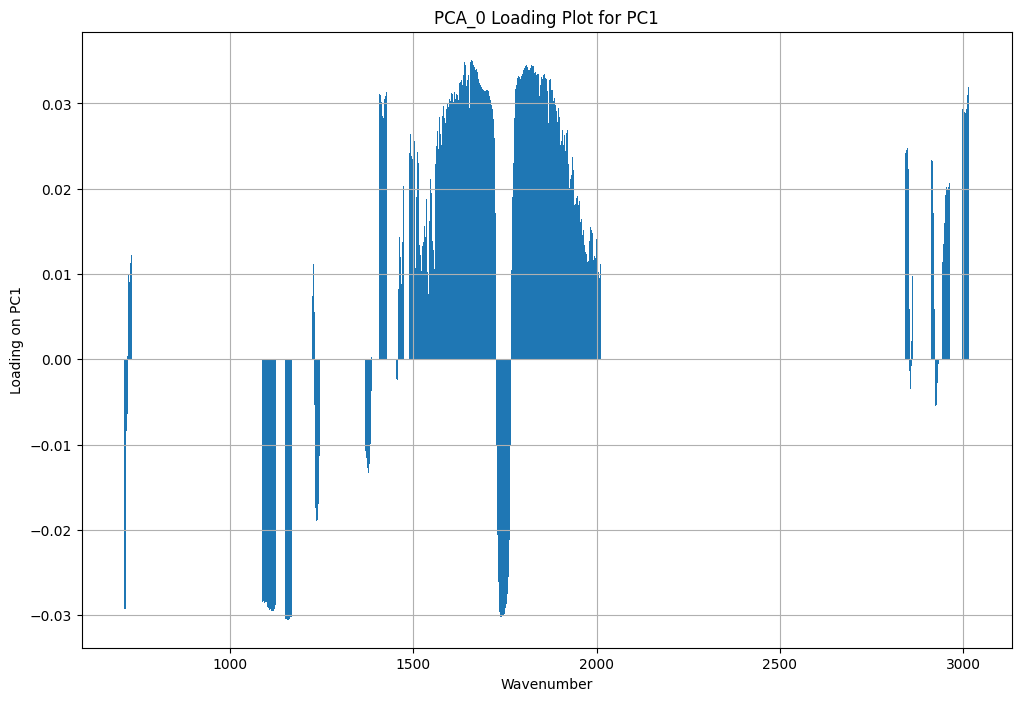

In [22]:
# Ensure correct length for loadings and wavenumber_columns
loadings = pca_0.components_.T
num_features = loadings.shape[0]

# Extract the wavenumber columns
wavenumber_columns = [float(col) for col in columns_to_focus]

# Adjust the number of loadings to match the number of wavenumber columns
if len(wavenumber_columns) != len(loadings):
    min_length = min(len(wavenumber_columns), len(loadings))
    wavenumber_columns = wavenumber_columns[:min_length]
    loadings = loadings[:min_length, :]

plt.figure(figsize=(15, 6))
plt.bar(wavenumber_columns, loadings[:, 0], align='center', width=2)
plt.xlabel('Wavenumber')
plt.ylabel('Loading on PC1')
plt.title('PCA_0 Loading Plot for PC1')
plt.grid(True)
plt.show()


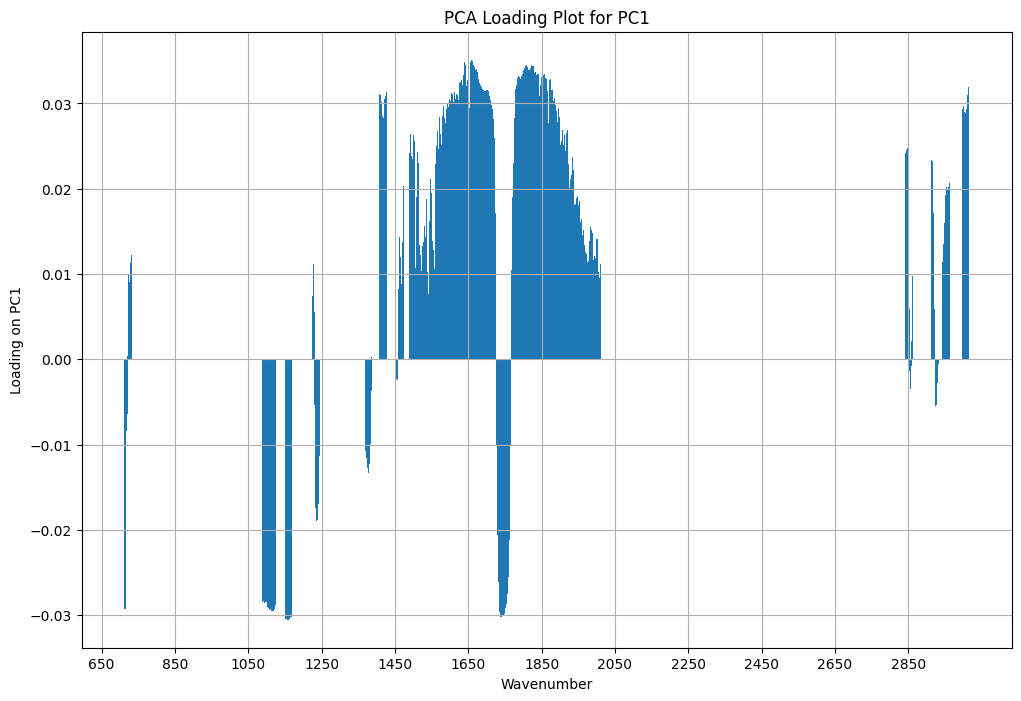

In [27]:
# Adjust the PCA loading plot to change the x-axis step to 250 with additional ticks at 750, 1250, etc.

plt.figure(figsize=(15, 6))
plt.bar(wavenumber_columns, loadings[:, 0], align='center', width=2)
plt.xlabel('Wavenumber')
plt.ylabel('Loading on PC1')
plt.title('PCA Loading Plot for PC1')

# Define x-axis ticks and labels
x_ticks = list(range(650, 3000, 200))
# x_minor_ticks = [x + 100 for x in x_ticks[:-1]]  # Add minor ticks at 750, 1250, etc.
plt.xticks(x_ticks )

plt.grid(True)
plt.show()


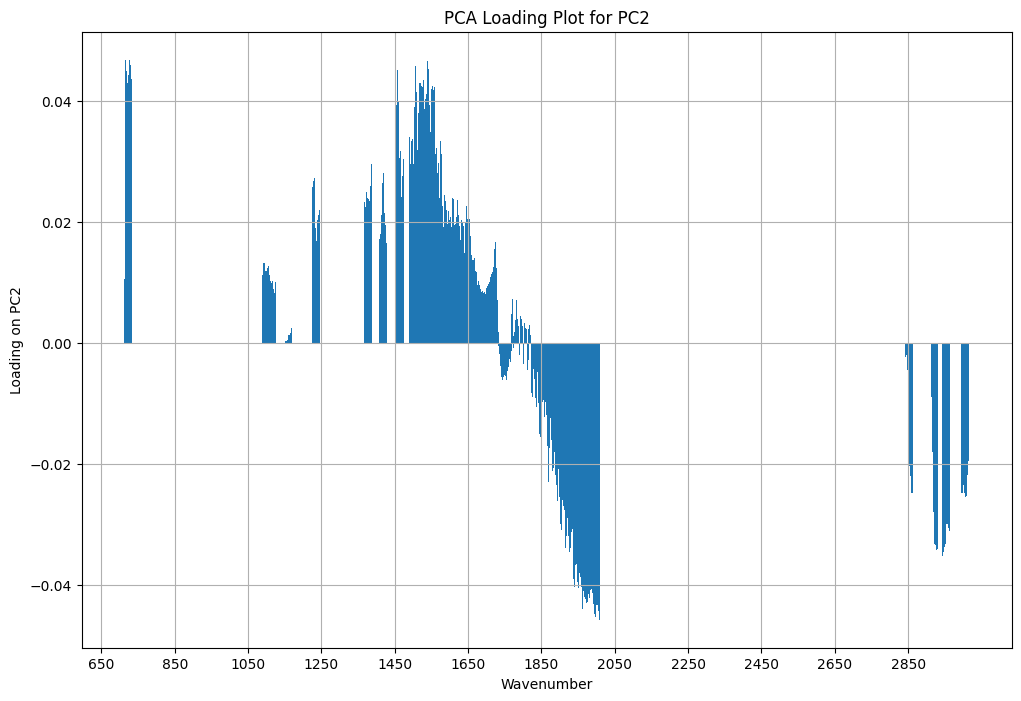

In [29]:
# PCA Loading plot for PC2 with real feature (column) names on the x-axis
plt.figure(figsize=(12, 8))
plt.bar(wavenumber_columns, loadings[:, 1], align='center', width=2)
plt.xlabel('Wavenumber')
plt.ylabel('Loading on PC2')
plt.title('PCA Loading Plot for PC2')

# Define x-axis ticks and labels
x_ticks = list(range(650, 3000, 200))
#x_minor_ticks = [x + 100 for x in x_ticks[:-1]]  # Add minor ticks at 750, 1250, etc.
plt.xticks(x_ticks) #+ x_minor_ticks)

plt.grid(True)
plt.show()


Explained Variance (PCA)

Objective: Understand how much of the total variance is captured by the top components.

Variance Ratios: Look at the explained variance ratios for the top principal components. Higher variance captured by the first few components indicates that those components are meaningful.

In [41]:
explained_variance = pca_0.explained_variance_ratio_
print(f'Explained variance ratios: {explained_variance}')


Explained variance ratios: [0.45207213 0.2369995  0.12727818 0.08689443 0.01082669 0.00791879
 0.00565082 0.00469505 0.00325769 0.00292603]


UMAP

In [30]:
import umap

In [32]:
df_0_sr_2 = df_0_sr_1.copy()

In [34]:
df_0_sr_2.head()

thnoth_name prov_char country_char tgp_name dgp_name fgp_name country_name  \
0    Non-Thai       SUX           ID  Group 3  Group 2  Group 3    Indonesia   
1    Non-Thai       SUX           ID  Group 3  Group 2  Group 3    Indonesia   
2    Non-Thai       KTX           ID  Group 3  Group 2  Group 4    Indonesia   
3    Non-Thai       SGR           MY  Group 2  Group 2  Group 3     Malaysia   
4    Non-Thai       SSX           ID  Group 3  Group 2  Group 3    Indonesia   

   2996.355  2996.837   2997.32  ...   727.514   727.996   728.478   728.961  \
0  0.021364  0.021383  0.021439  ...  0.067434  0.065359  0.063329  0.061421   
1  0.014427  0.014655  0.014873  ...  0.057494  0.055931  0.054566  0.053355   
2  0.013520  0.013648  0.013794  ...  0.055616  0.054881  0.054267  0.053654   
3  0.012089  0.012421  0.012758  ...  0.056227  0.054337  0.052418  0.050546   
4  0.014594  0.014797  0.014981  ...  0.054198  0.053183  0.052173  0.051142   

    729.443   729.925   730.407   730.889   731.371   731.853  
0  0.059656  0.057995  0.056354  0.054640  0.052793  0.050798  
1  0.052246  0.051206  0.050221  0.049295  0.048431  0.047623  
2  0.052934  0.052042  0.050966  0.049748  0.048458  0.047165  
3  0.048804  0.047253  0.045928  0.044826  0.043909  0.043111  
4  0.050101  0.049080  0.048113  0.047224  0.046416  0.045675  

[5 rows x 1583 columns]

c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


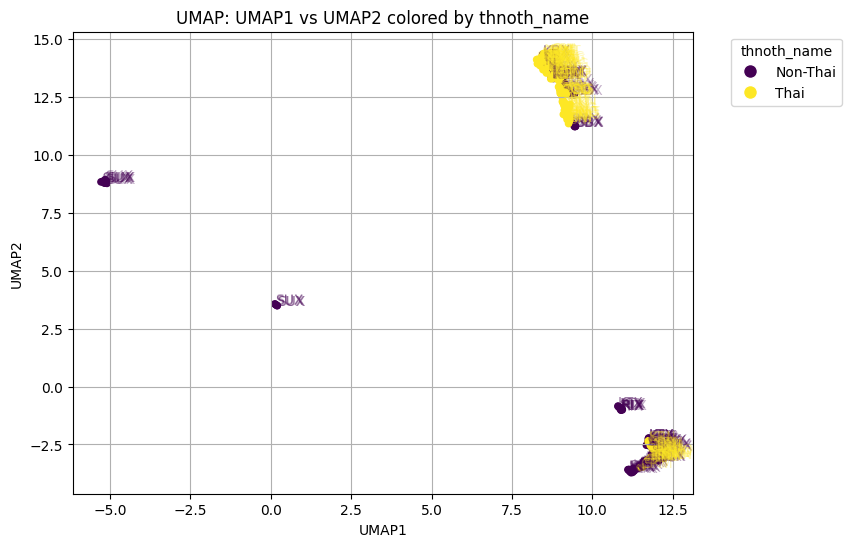

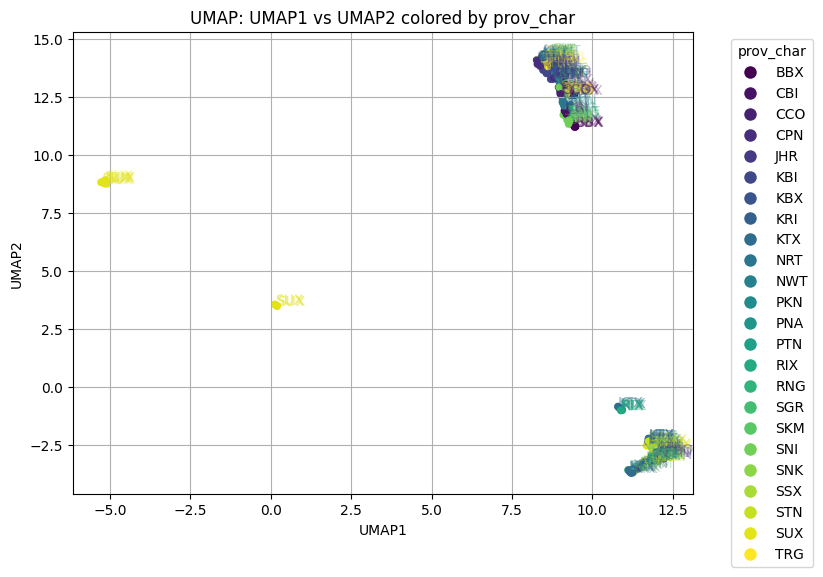

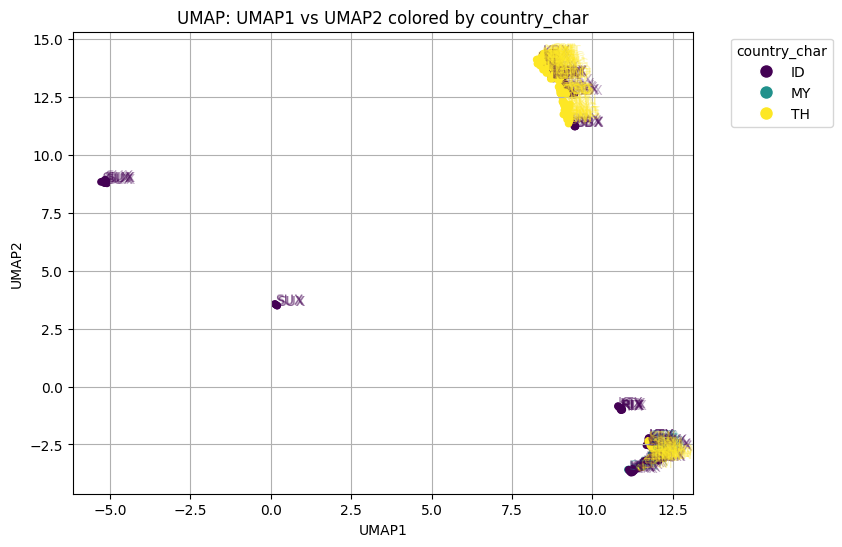

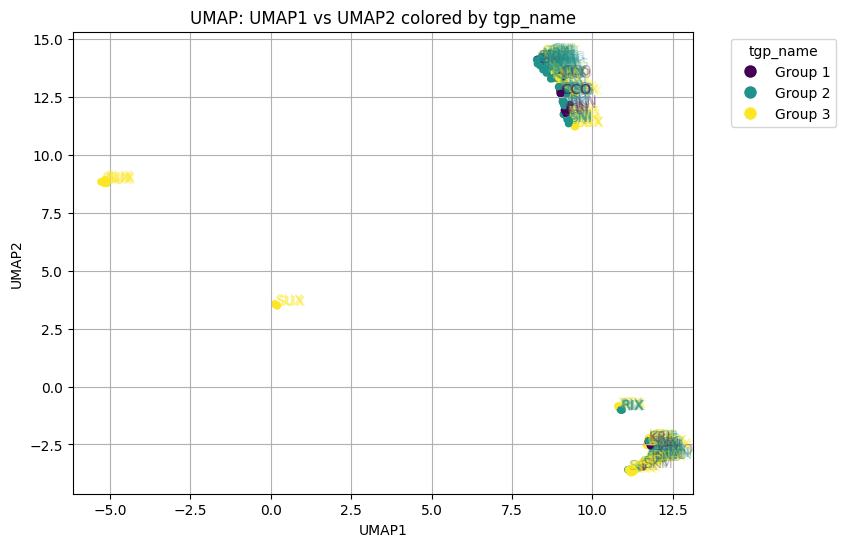

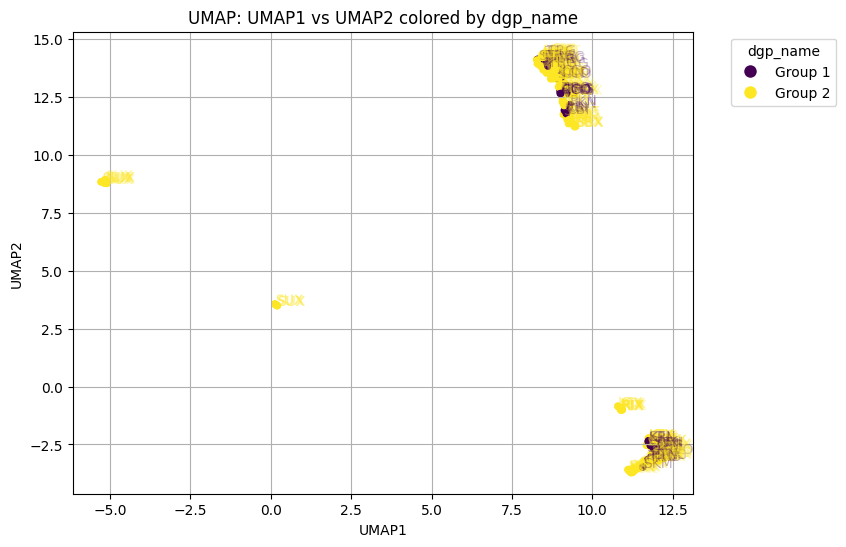

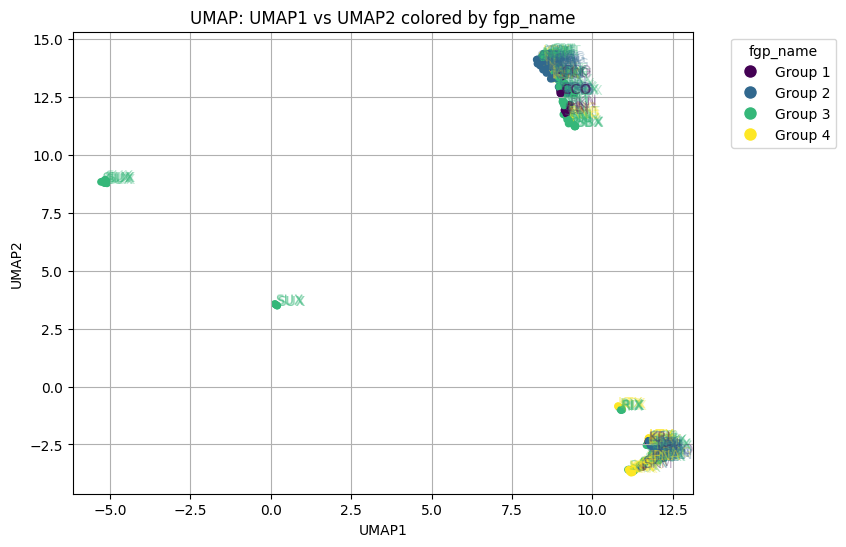

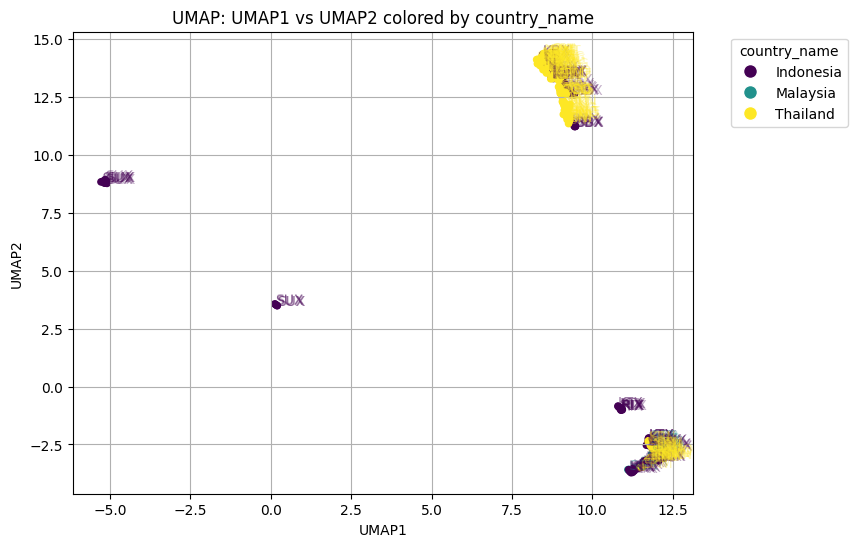

In [33]:
# Standardize the data (if not already standardized)
scaler_1 = StandardScaler()
scaled_data_1 = scaler_1.fit_transform(df_0_sr_2[columns_to_focus])

# Perform UMAP
umap_model = umap.UMAP(n_components=10, random_state=42)
umap_components = umap_model.fit_transform(scaled_data_1)

# Create a DataFrame with the UMAP components
umap_df = pd.DataFrame(data=umap_components, columns=[f'UMAP{i+1}' for i in range(10)])
umap_df = pd.concat([df_0_sr_2[['thnoth_name', 'prov_char', 'country_char', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name']], umap_df], axis=1)

# Plot UMAP1 vs UMAP2 with different cluster colors
string_cols = ['thnoth_name', 'prov_char', 'country_char', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name']

label_encoder = LabelEncoder()
for col in string_cols:
    encoded_categories = label_encoder.fit_transform(umap_df[col])
    
    plt.figure(figsize=(4, 3))
    scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=encoded_categories, cmap='viridis', s=20)
    plt.title(f'UMAP: UMAP1 vs UMAP2 colored by {col}')
    
    cmap = scatter.cmap
    norm = scatter.norm
    
    for j in range(len(umap_df)):
        plt.annotate(umap_df['prov_char'].iloc[j], 
                     (umap_df['UMAP1'].iloc[j], umap_df['UMAP2'].iloc[j]), 
                     color=cmap(norm(encoded_categories[j])), alpha=0.3)
    
    unique_labels = label_encoder.classes_
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=cmap(norm(value)))
               for value, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.grid(True)
    plt.show()

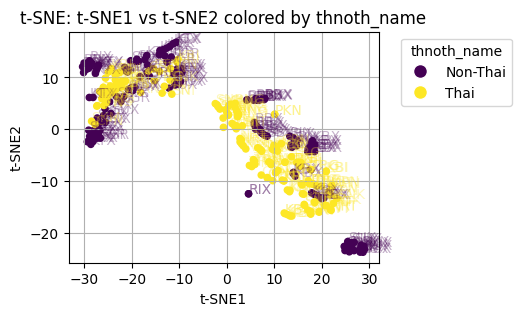

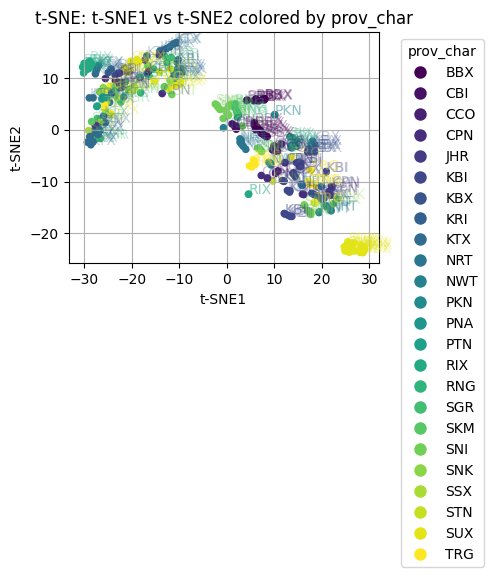

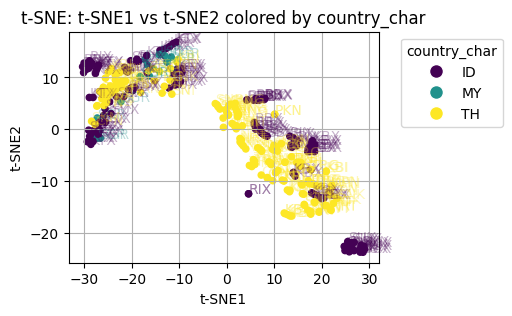

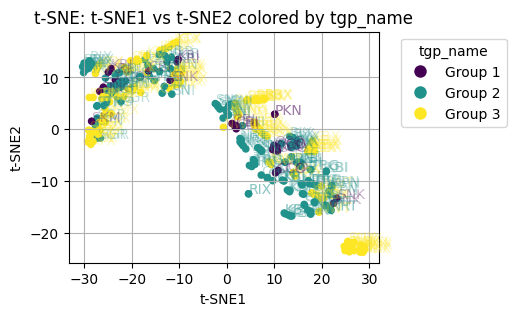

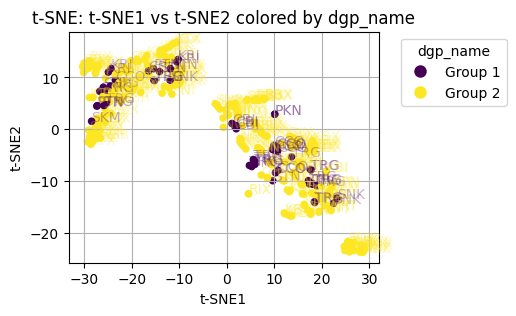

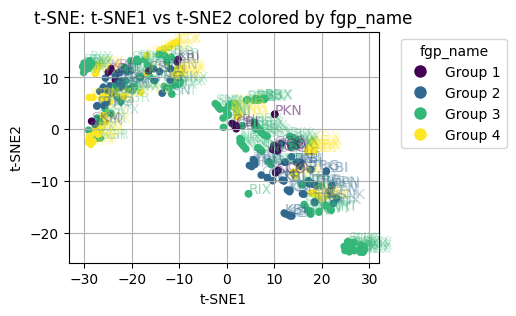

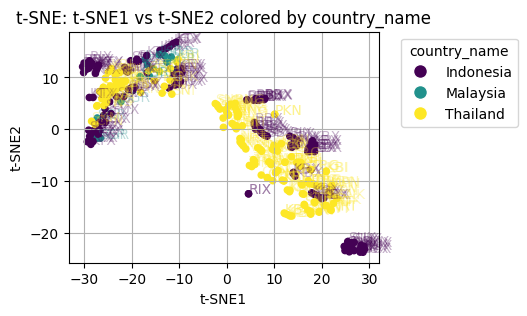

In [35]:
from sklearn.manifold import TSNE

# Perform t-SNE with 2 components
tsne_model = TSNE(n_components=2, random_state=42)
tsne_components = tsne_model.fit_transform(scaled_data_1)

# Create a DataFrame with the t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=[f't-SNE{i+1}' for i in range(2)])
tsne_df = pd.concat([df_0_sr_2[['thnoth_name', 'prov_char', 'country_char', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name']], tsne_df], axis=1)

# Plot t-SNE1 vs t-SNE2 with different cluster colors
for col in string_cols:
    encoded_categories = label_encoder.fit_transform(tsne_df[col])
    
    plt.figure(figsize=(4, 3))
    scatter = plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], c=encoded_categories, cmap='viridis', s=20)
    plt.title(f't-SNE: t-SNE1 vs t-SNE2 colored by {col}')
    
    cmap = scatter.cmap
    norm = scatter.norm
    
    for j in range(len(tsne_df)):
        plt.annotate(tsne_df['prov_char'].iloc[j], 
                     (tsne_df['t-SNE1'].iloc[j], tsne_df['t-SNE2'].iloc[j]), 
                     color=cmap(norm(encoded_categories[j])), alpha=0.3)
    
    unique_labels = label_encoder.classes_
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=cmap(norm(value)))
               for value, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('t-SNE1')
    plt.ylabel('t-SNE2')
    plt.grid(True)
    plt.show()


ICA

c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


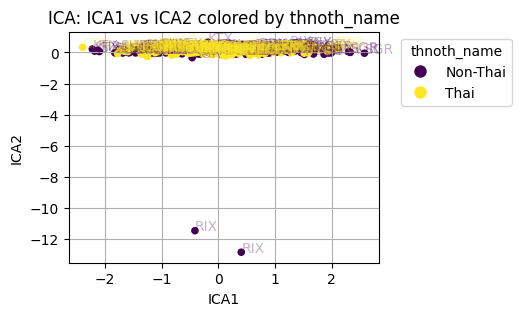

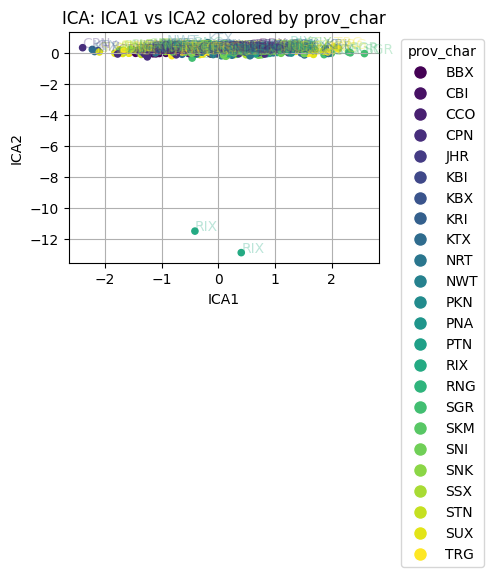

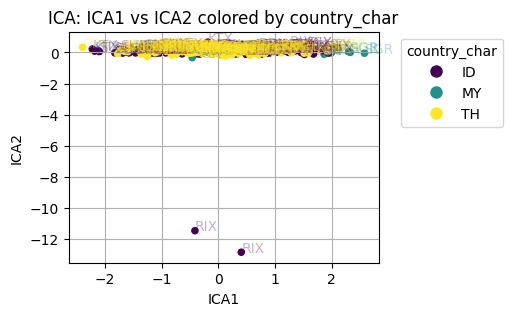

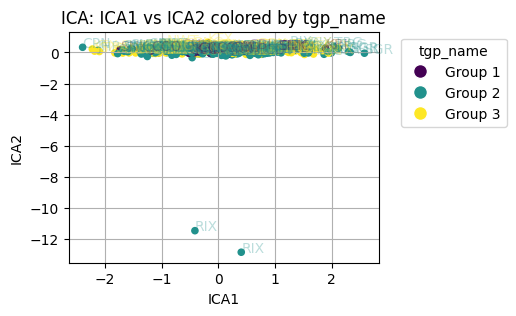

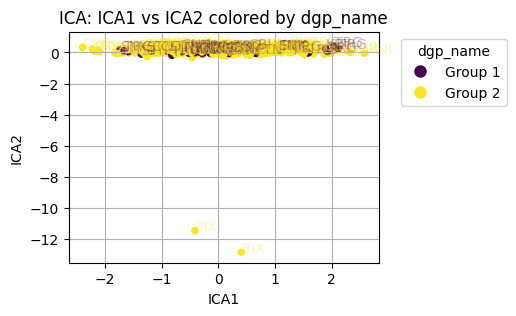

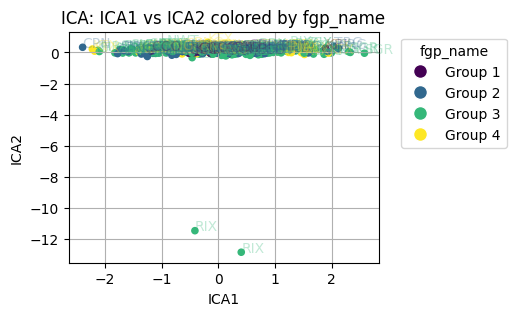

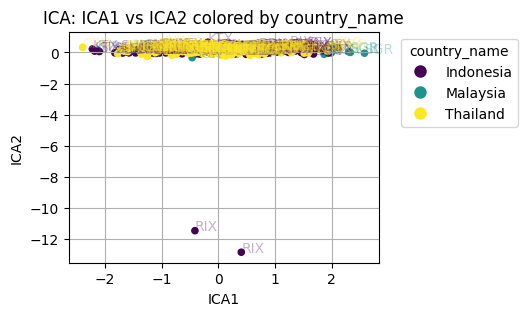

In [38]:
from sklearn.decomposition import FastICA

# Perform ICA
ica = FastICA(n_components=10, random_state=42)
ica_components = ica.fit_transform(scaled_data_1)

# Create a DataFrame with the ICA components
ica_df = pd.DataFrame(data=ica_components, columns=[f'ICA{i+1}' for i in range(10)])
ica_df = pd.concat([df_0_sr_2[['thnoth_name', 'prov_char', 'country_char', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name']], ica_df], axis=1)

# Plot ICA1 vs ICA2 with different cluster colors
for col in string_cols:
    encoded_categories = label_encoder.fit_transform(ica_df[col])
    
    plt.figure(figsize=(4, 3))
    scatter = plt.scatter(ica_df['ICA1'], ica_df['ICA2'], c=encoded_categories, cmap='viridis', s=20)
    plt.title(f'ICA: ICA1 vs ICA2 colored by {col}')
    
    cmap = scatter.cmap
    norm = scatter.norm
    
    for j in range(len(ica_df)):
        plt.annotate(ica_df['prov_char'].iloc[j], 
                     (ica_df['ICA1'].iloc[j], ica_df['ICA2'].iloc[j]), 
                     color=cmap(norm(encoded_categories[j])), alpha=0.3)
    
    unique_labels = label_encoder.classes_
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=cmap(norm(value)))
               for value, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('ICA1')
    plt.ylabel('ICA2')
    plt.grid(True)
    plt.show()


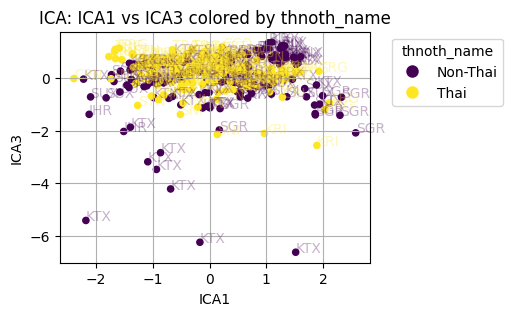

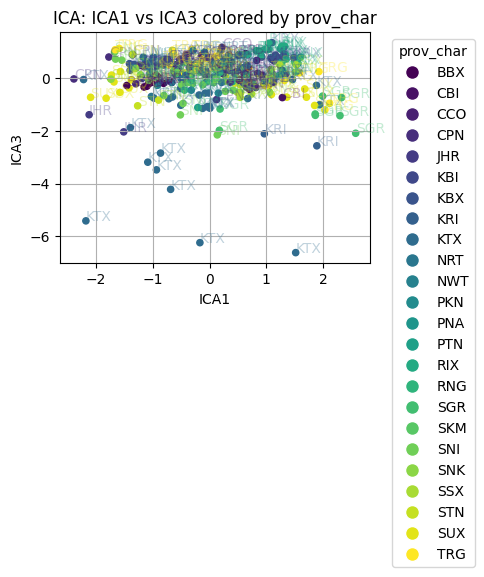

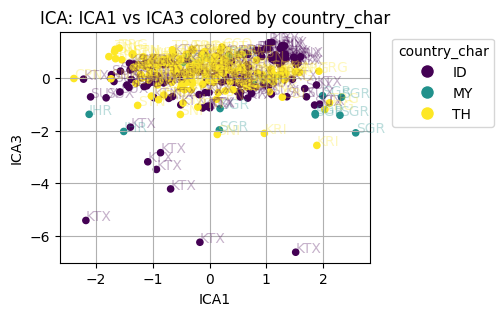

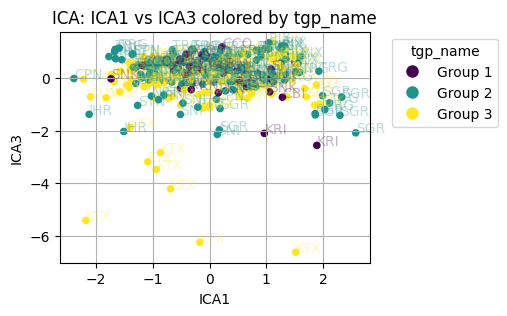

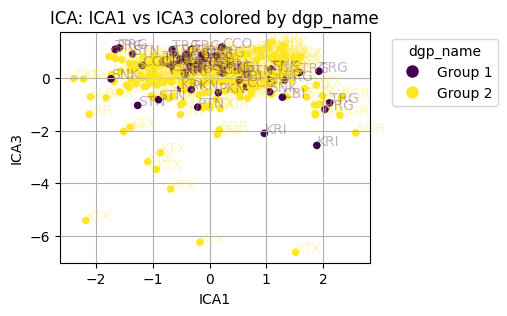

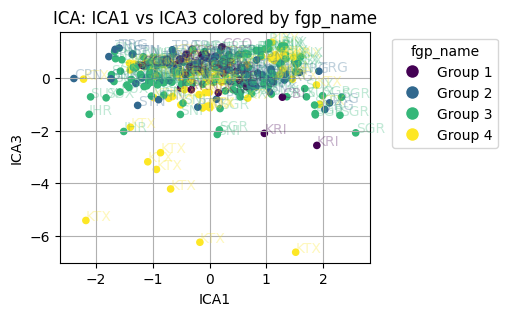

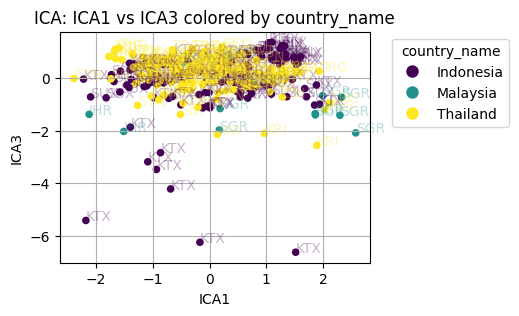

In [39]:
# Plot ICA1 vs ICA3 with different cluster colors
for col in string_cols:
    encoded_categories = label_encoder.fit_transform(ica_df[col])
    
    plt.figure(figsize=(4, 3))
    scatter = plt.scatter(ica_df['ICA1'], ica_df['ICA3'], c=encoded_categories, cmap='viridis', s=20)
    plt.title(f'ICA: ICA1 vs ICA3 colored by {col}')
    
    cmap = scatter.cmap
    norm = scatter.norm
    
    for j in range(len(ica_df)):
        plt.annotate(ica_df['prov_char'].iloc[j], 
                     (ica_df['ICA1'].iloc[j], ica_df['ICA3'].iloc[j]), 
                     color=cmap(norm(encoded_categories[j])), alpha=0.3)
    
    unique_labels = label_encoder.classes_
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=cmap(norm(value)))
               for value, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('ICA1')
    plt.ylabel('ICA3')
    plt.grid(True)
    plt.show()

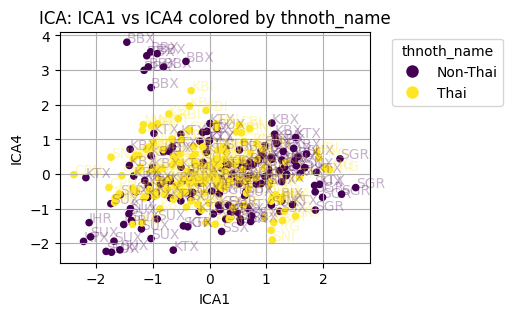

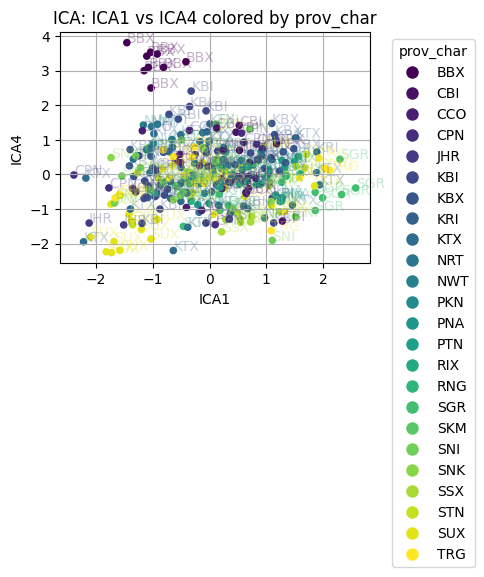

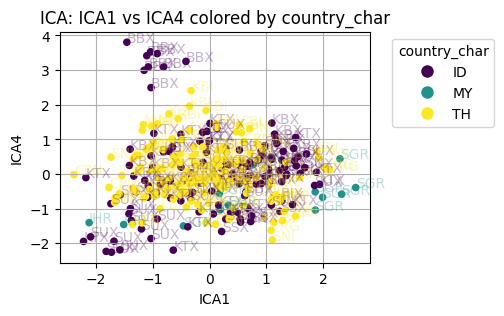

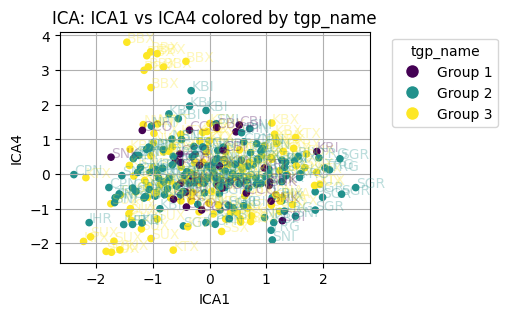

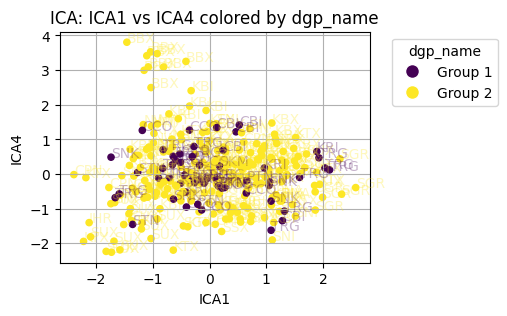

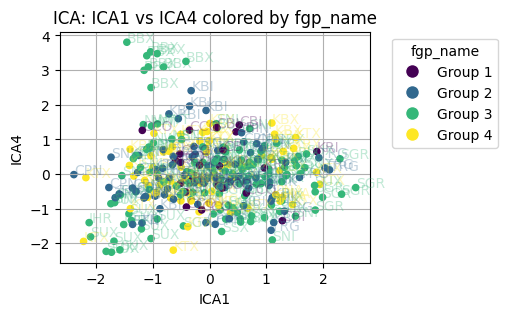

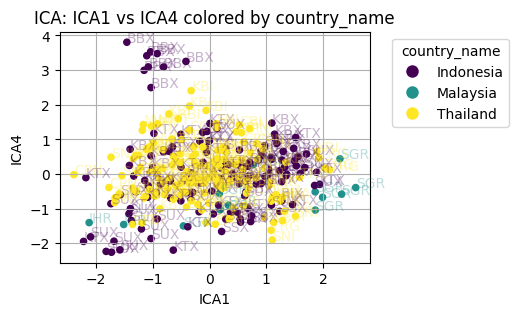

In [40]:
# Plot ICA1 vs ICA4 with different cluster colors
for col in string_cols:
    encoded_categories = label_encoder.fit_transform(ica_df[col])
    
    plt.figure(figsize=(4, 3))
    scatter = plt.scatter(ica_df['ICA1'], ica_df['ICA4'], c=encoded_categories, cmap='viridis', s=20)
    plt.title(f'ICA: ICA1 vs ICA4 colored by {col}')
    
    cmap = scatter.cmap
    norm = scatter.norm
    
    for j in range(len(ica_df)):
        plt.annotate(ica_df['prov_char'].iloc[j], 
                     (ica_df['ICA1'].iloc[j], ica_df['ICA4'].iloc[j]), 
                     color=cmap(norm(encoded_categories[j])), alpha=0.3)
    
    unique_labels = label_encoder.classes_
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markersize=10, markerfacecolor=cmap(norm(value)))
               for value, label in enumerate(unique_labels)]
    
    plt.legend(handles=handles, title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('ICA1')
    plt.ylabel('ICA4')
    plt.grid(True)
    plt.show()

In [ ]:
explained_variance = pca_0.explained_variance_ratio_
print(f'Explained variance ratios: {explained_variance}')


Statistical Tests

Objective: Check for significant differences between groups.

ANOVA or t-tests: Conduct ANOVA or t-tests on the components or cluster assignments to see if there are significant differences between groups.

TH vs Non-TH

In [42]:
from scipy.stats import f_oneway

# Example for PCA components
groups = [pca_df_0[pca_df_0['thnoth_name'] == label][['PC1', 'PC2']] for label in pca_df_0['thnoth_name'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f'ANOVA results: F-statistic = {f_stat}, p-value = {p_val}')


ANOVA results: F-statistic = [4.86048051 0.43278769], p-value = [0.02823246 0.51112536]


In [43]:
groups = [umap_df[umap_df['thnoth_name'] == label][['UMAP1', 'UMAP2']] for label in umap_df['thnoth_name'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f'ANOVA results: F-statistic = {f_stat}, p-value = {p_val}')

ANOVA results: F-statistic = [ 3.03096044 42.83845202], p-value = [8.27080515e-02 2.54682587e-10]


In [44]:
groups = [tsne_df[tsne_df['thnoth_name'] == label][['t-SNE1', 't-SNE2']] for label in tsne_df['thnoth_name'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f'ANOVA results: F-statistic = {f_stat}, p-value = {p_val}')

ANOVA results: F-statistic = [11.79360302 11.25556565], p-value = [0.00067747 0.0008952 ]


In [45]:
groups = [ica_df[ica_df['thnoth_name'] == label][['ICA1', 'ICA2']] for label in ica_df['thnoth_name'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f'ANOVA results: F-statistic = {f_stat}, p-value = {p_val}')

ANOVA results: F-statistic = [5.71548696 1.4874757 ], p-value = [0.01742828 0.22356016]
